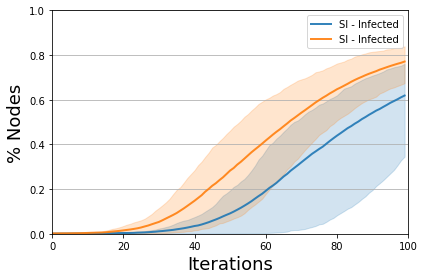

In [12]:
import networkx as nx
import ndlib.models.ModelConfig as mc
from bokeh.io import show
import ndlib.models.epidemics.SIModel as si
from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison
import json
# Network topology
#g = nx.karate_club_graph()
fh=open("email.txt", 'rb')
G = nx.read_weighted_edgelist(fh,nodetype=None, encoding='utf-8')
fh.close()
g = nx.convert_node_labels_to_integers(G, first_label=0, ordering="default", label_attribute = None)

from ndlib.utils import multi_runs
import warnings
warnings.filterwarnings("ignore")
#--------------------------------------------------------------
model = si.SIModel(g)
config = mc.Configuration()
config.add_model_parameter('beta', 0.01)


infected_nodes = [16]
config.add_model_initial_configuration("Infected", infected_nodes)
model.set_initial_status(config)

trends = multi_runs(model, execution_number=10, iteration_number=100, nprocesses=4)
#--------------------------------------------------------------
model1 = si.SIModel(g)
config = mc.Configuration()
config.add_model_parameter('beta', 0.01)

infected_nodes1 = [341]
config.add_model_initial_configuration("Infected", infected_nodes1)
model.set_initial_status(config)
trends1 = multi_runs(model, execution_number=10, iteration_number=100, nprocesses=4)
#--------------------------------------------------------------

from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison
viz = DiffusionTrendComparison([model,model1], [trends,trends1], statuses=['Infected'])
viz.plot(percentile=90)

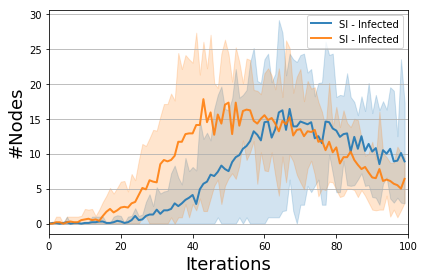

In [13]:
from ndlib.viz.mpl.PrevalenceComparison import DiffusionPrevalenceComparison
viz = DiffusionPrevalenceComparison([model, model1], [trends, trends1], statuses=['Infected'])
viz.plot(percentile=90)